# Competi Kaggle: ¿Qué dices colega?

## 1. Carga datos & procesado imágenes

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
from skimage.io import imread
import cv2
import random

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [13]:
train_path = 'D:\\ARTURO\\BBDD\\Competicion Kaggle Que_Dices_Colega\\train\\'
test_path = 'D:\\ARTURO\\BBDD\\Competicion Kaggle Que_Dices_Colega\\test\\'
target_df = pd.read_csv('D:\\ARTURO\\BBDD\\Competicion Kaggle Que_Dices_Colega\\file_target.csv')

In [3]:
labels_target = target_df['target'].unique()

In [4]:
labels_int = pd.DataFrame({'target':labels_target,
                           'target_int':0})

In [5]:
for i in range(len(labels_target)):
    labels_int['target_int'][i]=i

<ipython-input-5-0d4d09667d7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_int['target_int'][i]=i


In [6]:
final_target = target_df.copy()

In [7]:
final_target = final_target.merge(labels_int, left_on='target', right_on='target')

In [8]:
target_int = final_target.copy()

In [9]:
target_int.drop(columns='target', inplace=True)

In [10]:
target_int = target_int.astype('str')

In [14]:
imagenes = []
filenames = os.listdir(train_path)

for img in os.listdir(train_path):
    image = imread(train_path + img)
    smallimage = cv2.resize(image, (75, 75))
    smallimage = smallimage / 255.
    imagenes.append(smallimage)

In [15]:
filenames = pd.DataFrame({'archivo':filenames})

In [16]:
file = filenames.merge(target_int, left_on='archivo', right_on='archivo')

In [17]:
X_train = np.array(imagenes)

In [18]:
len(X_train)

9000

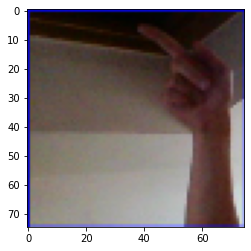

In [19]:
plt.imshow(X_train[0])

In [20]:
y_train = file['target_int']

In [21]:
y_train = np.array(y_train).astype('int')

In [22]:
y_train.shape

(9000,)

In [23]:
y_prueba = file['target_int'].copy()

In [24]:
y_prueba = keras.utils.to_categorical(np.asarray(y_prueba.factorize()[0]))

In [25]:
y_prueba[1]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [26]:
file2 = filenames.merge(target_df, left_on='archivo', right_on='archivo')

In [27]:
y_prueba2 = file['target_int'].copy()

In [28]:
file2.drop(columns='archivo',inplace=True)

In [29]:
y_prueba2 = pd.get_dummies(file2)

In [30]:
y_prueba2.shape

(9000, 29)

In [123]:
y_prueba2

,target_A,target_B,target_C,target_D,target_E,target_F,target_G,target_H,target_I,target_J,...,target_T,target_U,target_V,target_W,target_X,target_Y,target_Z,target_del,target_nothing,target_space
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## 2. Modelo

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(75, 75, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(29, activation='softmax'))

In [32]:
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['acc'])

In [33]:
model.fit(X_train, y_prueba2, epochs=5,
          batch_size=1, validation_split=0.2)

Epoch 1/5
2450/7200 [=========>....................] - ETA: 2:25 - loss: 3.3806 - acc: 0.0363

KeyboardInterrupt: 

## 2.2 Otro modelo

In [143]:
from sklearn.model_selection import train_test_split

train_df, validate_df = train_test_split(file,
                                         test_size=0.20,
                                         random_state=42)

In [144]:
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [145]:
# Parámetros ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [112]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    train_path,
                                                    x_col='archivo',
                                                    y_col='target_int',
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(50, 50),
                                                    color_mode='grayscale')

# Flow training images in batches of 20 using train_datagen generator
validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                    train_path,
                                                    x_col='archivo',
                                                    y_col='target_int',
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(50, 50),
                                                    color_mode='grayscale')

Found 7200 validated image filenames belonging to 29 classes.
Found 1800 validated image filenames belonging to 29 classes.


In [113]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    train_path,
                                                    x_col='archivo',
                                                    y_col='target_int',
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(50, 50))

# Flow training images in batches of 20 using train_datagen generator
validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                    train_path,
                                                    x_col='archivo',
                                                    y_col='target_int',
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(50, 50))

Found 7200 validated image filenames belonging to 29 classes.
Found 1800 validated image filenames belonging to 29 classes.


In [114]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape=(50, 50, 3),
                   include_top=False,
                   weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

# Podemos acceder a cada layer.    

##### FULLY CONNECTED LAYER #####
# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = Dense(29, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

In [115]:
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['acc'])

In [129]:
vgghist = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 5)

Epoch 1/5
225/225 [==============================] - 83s 368ms/step - loss: 0.4050 - acc: 0.8783 - val_loss: 0.3471 - val_acc: 0.9028
Epoch 2/5
225/225 [==============================] - 83s 369ms/step - loss: 0.3751 - acc: 0.8874 - val_loss: 0.3317 - val_acc: 0.9072
Epoch 3/5
225/225 [==============================] - 83s 369ms/step - loss: 0.3503 - acc: 0.8963 - val_loss: 0.3325 - val_acc: 0.9028
Epoch 4/5
225/225 [==============================] - 80s 357ms/step - loss: 0.3234 - acc: 0.9035 - val_loss: 0.3128 - val_acc: 0.9133
Epoch 5/5
225/225 [==============================] - 78s 347ms/step - loss: 0.3063 - acc: 0.9069 - val_loss: 0.2868 - val_acc: 0.9161


## 3. Predicción y test

In [130]:
imagenes_test = []
filenames_test = os.listdir(test_path)

for img in os.listdir(test_path):
    image = imread(test_path + img)
    smallimage = cv2.resize(image, (50, 50))
    smallimage = smallimage / 255.
    imagenes_test.append(smallimage)

In [131]:
X_test = np.array(imagenes_test)

In [132]:
X_test.shape

(1150, 50, 50, 3)

In [133]:
predictions = model.predict(X_test)

In [134]:
predictions.shape

(1150, 29)

## 4. Exportación sample

In [135]:
max_val = []

for i in range(len(predictions)):
    val = np.argmax(predictions[i])
    max_val.append(val)

In [136]:
true_values = []

for i in max_val:
    for v in labels_int['target_int']:
        if i == v:
            true_values.append(labels_int['target'][v])

In [137]:
df_submission = pd.DataFrame({'archivo': filenames_test,
                            'target':true_values})

In [138]:
df_submission.to_csv('submission_1.csv', index=False)

In [139]:
df_submission

,archivo,target
0,0.jpg,C
1,1.jpg,T
2,10.jpg,K
3,100.jpg,Q
4,1000.jpg,P
...,...,...
1145,995.jpg,K
1146,996.jpg,G
1147,997.jpg,T
1148,998.jpg,W
